<a href="https://colab.research.google.com/github/glmoo7git/self-Project/blob/master/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Project 
indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

In [39]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
file = r'/content/drive/My Drive/glm.ar.iitm/pre placement preparation /hands-on Data Analysis Projects using Python /13-Logistic-Regression/advertising.csv'
df = pd.read_csv(file, error_bad_lines = False)

In [41]:
df.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

In [42]:
from datetime import datetime

In [43]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [44]:
df.describe()

Daily Time Spent on Site          Age  ...         Male  Clicked on Ad
count               1000.000000  1000.000000  ...  1000.000000     1000.00000
mean                  65.000200    36.009000  ...     0.481000        0.50000
std                   15.853615     8.785562  ...     0.499889        0.50025
min                   32.600000    19.000000  ...     0.000000        0.00000
25%                   51.360000    29.000000  ...     0.000000        0.00000
50%                   68.215000    35.000000  ...     0.000000        0.50000
75%                   78.547500    42.000000  ...     1.000000        1.00000
max                   91.430000    61.000000  ...     1.000000        1.00000

[8 rows x 6 columns]

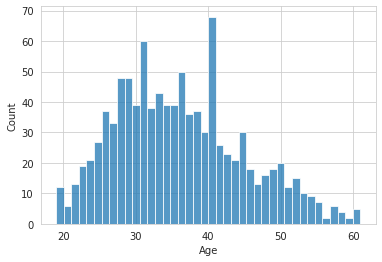

In [45]:
sns.set_style('whitegrid')
sns.histplot(data = df['Age'], bins = 40)

#Z < M < X
positive skew

In [ ]:
Mode = df['Age'].mode()[0]
Median = df['Age'].median()
print('mean (X) =' +str(df['Age'].mean()))
print('Median (M)=' +str(Median))
print('Mode (Z)= '+str(Mode))

mean (X) =36.009
Median (M)=35.0
Mode (Z)= 31


#EDA

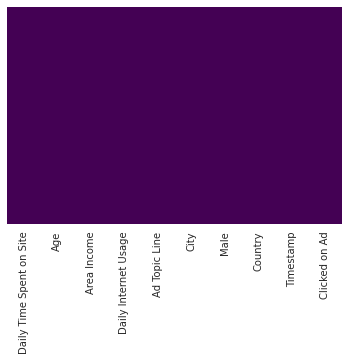

In [56]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

no missing data 

In [46]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

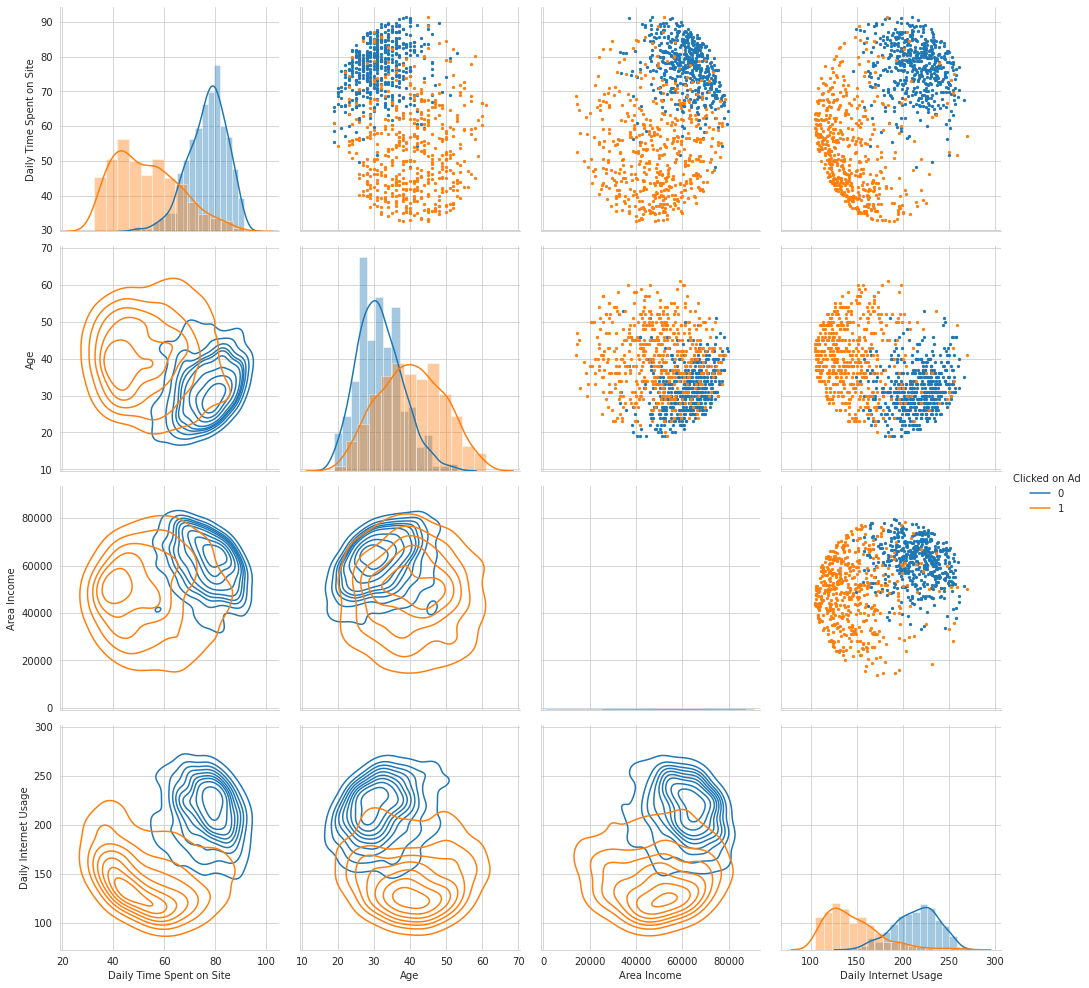

In [54]:
grid = sns.PairGrid(df,hue='Clicked on Ad' ,vars=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage'],height=3.5)
grid.map_diag(sns.distplot)
grid.map_upper(plt.scatter,s=5)
grid.map_lower(sns.kdeplot)
grid.add_legend()

more daily time spend on site decrease like on the site regarless of any backgroung

more internet use reduces likes 

more likes comes from Age group of 30 to 50 years

more like comes from higher Area of income


#Logistic Regression

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
df.head(1)

Daily Time Spent on Site  Age  ...           Timestamp  Clicked on Ad
0                     68.95   35  ... 2016-03-27 00:53:11              0

[1 rows x 10 columns]

In [59]:
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
prediction = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(confusion_matrix(y_test,prediction))

[[149   8]
 [ 14 129]]


In [64]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



#notes

precision = TP/(TP+FP)    (out of total predicted positive what is the actual positve)

recall = TP/(TP+FN)  (out of tolal actual positive what is the predicted positive)

f1-score = 2*(precision * recall)/(precision + recall)  : it is a combination of precision and recall

[link to know in more details](https://www.youtube.com/watch?v=8U65xDCzs_4)

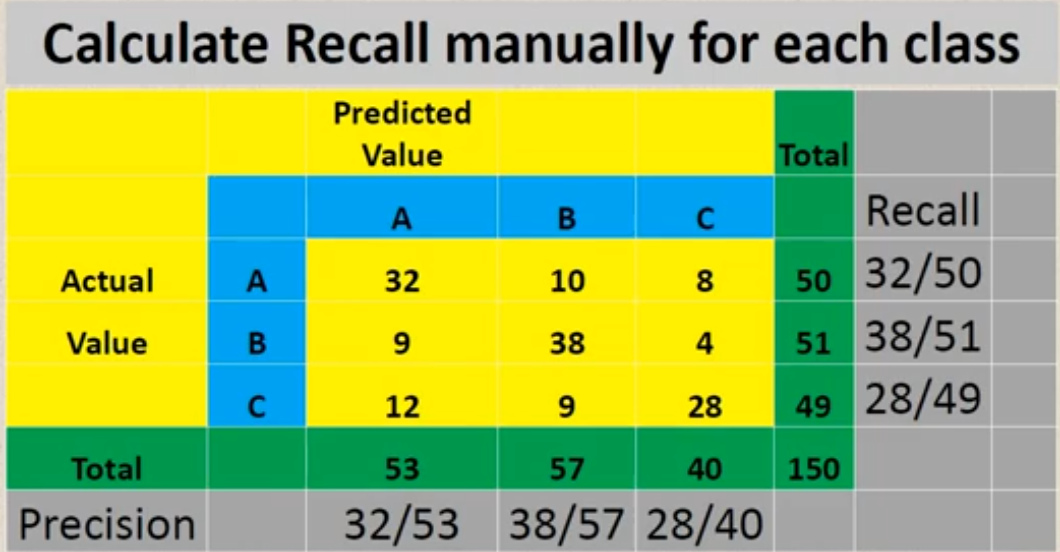

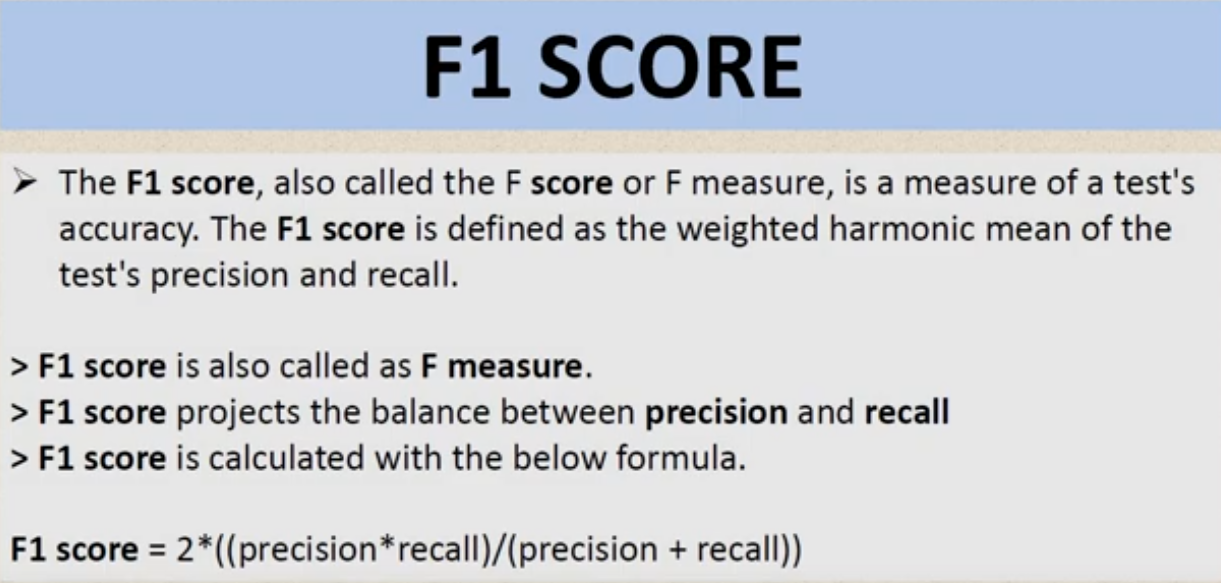

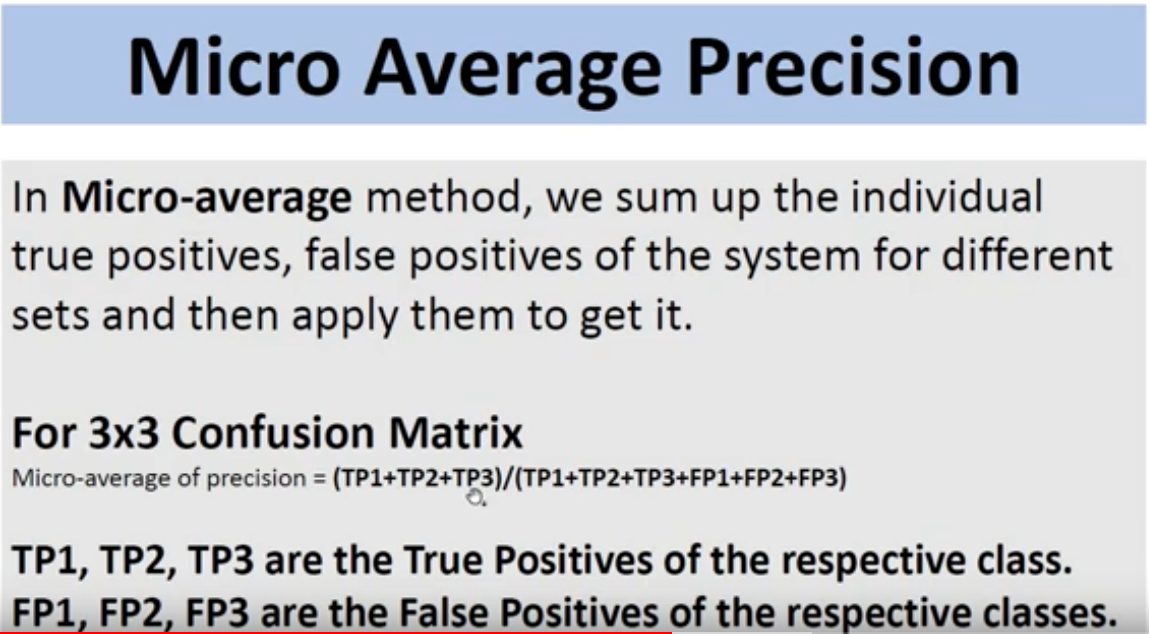

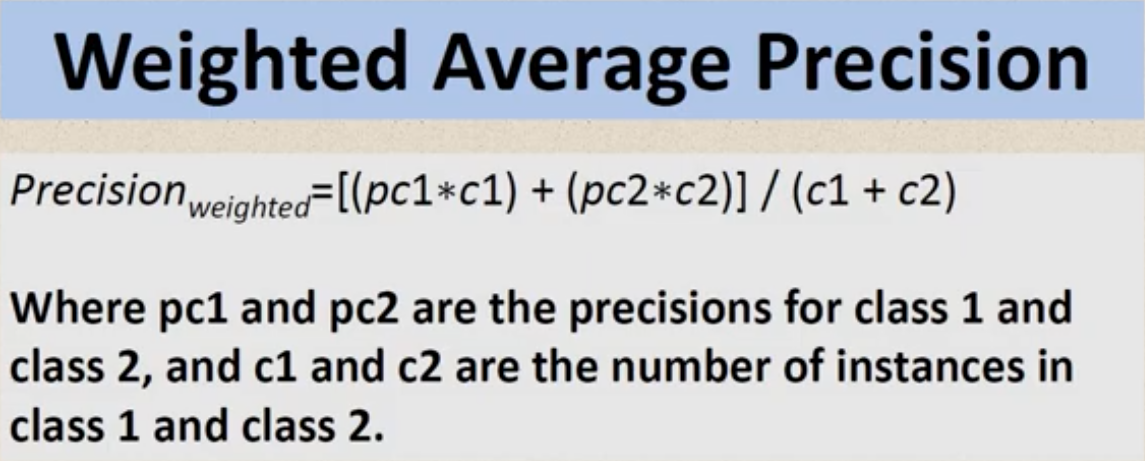

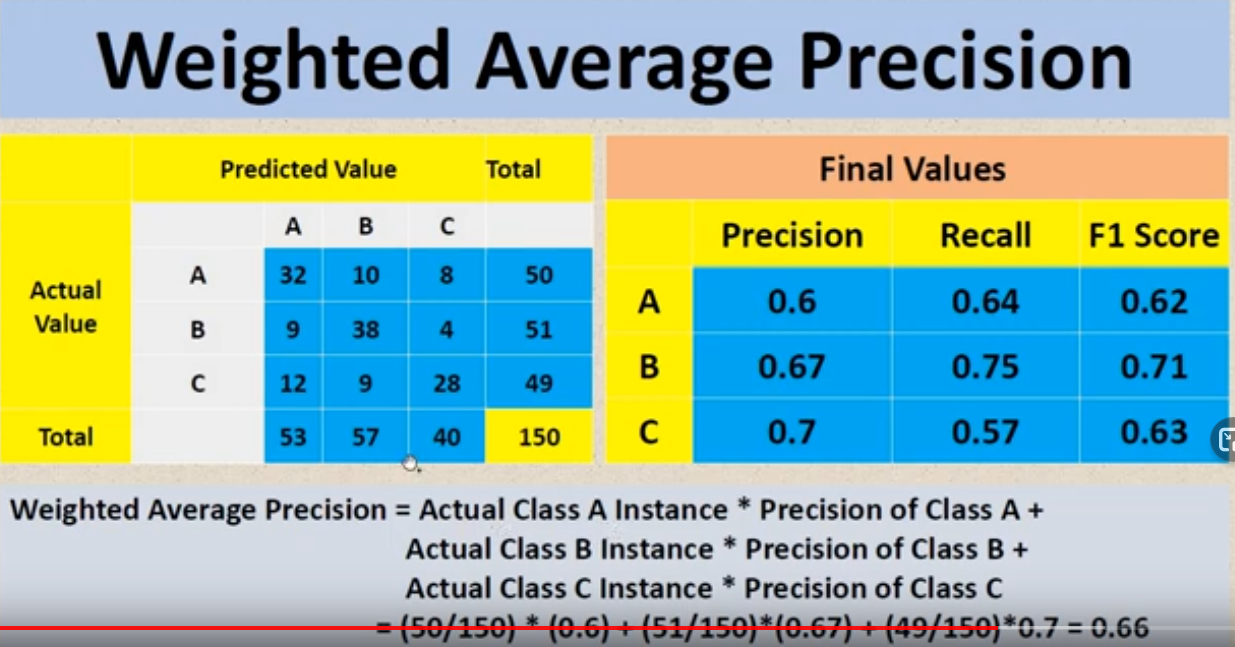